## Machine Learning - EX2

In [62]:
# Import 
from LinearRegression import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Experiments

### On synthetic data

In [63]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

#print("X:", X)
#print("y:", y)

model = LinearRegression(alpha=0.01, num_iters=1000)

# Training the model
model.fit(X, y)

# Making predictions
#predictions = model.predict(X)

print("optimized parameter (theta):", model.theta)

Iteration 0: Cost 3.6533567295429217
test
Iteration 1: Cost 2.845180268969425
test
Iteration 2: Cost 2.216904218090652
test
Iteration 3: Cost 1.7284788653410068
test
Iteration 4: Cost 1.348770441664608
test
Iteration 5: Cost 1.0535762364931844
test
Iteration 6: Cost 0.8240815923675531
test
Iteration 7: Cost 0.6456604063414225
test
Iteration 8: Cost 0.5069426660364732
test
Iteration 9: Cost 0.3990895725884571
test
Iteration 10: Cost 0.31523003709712716
test
Iteration 11: Cost 0.25002262530466796
test
Iteration 12: Cost 0.19931502298020606
test
Iteration 13: Cost 0.15987931176593834
test
Iteration 14: Cost 0.12920617841621315
test
Iteration 15: Cost 0.10534493756590538
test
Iteration 16: Cost 0.08677916893335111
test
Iteration 17: Cost 0.07233004040490709
test
Iteration 18: Cost 0.06108115351768685
test
Iteration 19: Cost 0.05232011998339201
test
Iteration 20: Cost 0.04549314455715657
test
Iteration 21: Cost 0.040169718754217876
test
Iteration 22: Cost 0.0360151745183107
test
Iteration 2

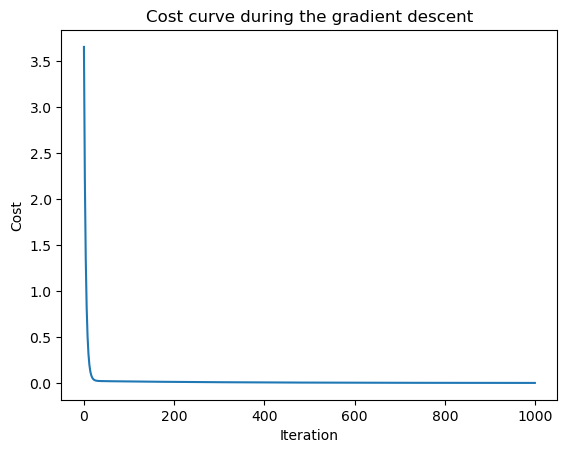

In [64]:
def plot_cost(model):
    plt.plot(model.cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost curve during the gradient descent')
    plt.show()

plot_cost(model)


## Crime and communities data set

In [65]:
# Load and transfrom the data into a pandas DataFrame
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 


X = pd.DataFrame(X, columns=communities_and_crime.feature_names)
y = pd.DataFrame(y, columns=communities_and_crime.target_names)

# Concatenate X and y 
full_df = pd.concat([X, y], axis=1)

# export the data

### Preprocessing

In [66]:
# drop columns if they have more then 50% missing values
# Replace '?' with NaN
full_df = full_df.replace('?', np.nan)

missing_percentage = full_df.isnull().mean() * 100
#
columns_to_drop = missing_percentage[missing_percentage > 50].index
full_df = full_df.drop(columns=columns_to_drop)

# Check the shape of the cleaned dataframe
print(full_df.shape)

# Drop the column communityname -> encoding the column would result in too many columns
full_df = full_df.drop(columns=['communityname'])

# Impute missing values with the median value
full_df = full_df.fillna(full_df.median())

# Check if there are any missing values
print(full_df.isnull().sum().sum())
display(full_df)


(1994, 104)
0


state  fold  population  householdsize  racepctblack  racePctWhite  \
0         8     1        0.19           0.33          0.02          0.90   
1        53     1        0.00           0.16          0.12          0.74   
2        24     1        0.00           0.42          0.49          0.56   
3        34     1        0.04           0.77          1.00          0.08   
4        42     1        0.01           0.55          0.02          0.95   
...     ...   ...         ...            ...           ...           ...   
1989     12    10        0.01           0.40          0.10          0.87   
1990      6    10        0.05           0.96          0.46          0.28   
1991      9    10        0.16           0.37          0.25          0.69   
1992     25    10        0.08           0.51          0.06          0.87   
1993      6    10        0.20           0.78          0.14          0.46   

      racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
0             0.12         0.17         0.34         0.47  ...   
1             0.45         0.07         0.26         0.59  ...   
2             0.17         0.04         0.39         0.47  ...   
3             0.12         0.10         0.51         0.50  ...   
4             0.09         0.05         0.38         0.38  ...   
...            ...          ...          ...          ...  ...   
1989          0.12         0.16         0.43         0.51  ...   
1990          0.83         0.32         0.69         0.86  ...   
1991          0.04         0.25         0.35         0.50  ...   
1992          0.22         0.10         0.58         0.74  ...   
1993          0.24         0.77         0.50         0.62  ...   

      PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0               0.12              0.42            0.50           0.51   
1               0.21              0.50            0.34           0.60   
2               0.14              0.49            0.54           0.67   
3               0.19              0.30            0.73           0.64   
4               0.11              0.72            0.64           0.61   
...              ...               ...             ...            ...   
1989            0.22              0.28            0.34           0.48   
1990            0.53              0.25            0.17           0.10   
1991            0.25              0.68            0.61           0.79   
1992            0.45              0.64            0.54           0.59   
1993            0.68              0.50            0.34           0.35   

      PctSameState85  LandArea  PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
0               0.64      0.12     0.26            0.20                 0.32   
1               0.52      0.02     0.12            0.45                 0.00   
2               0.56      0.01     0.21            0.02                 0.00   
3               0.65      0.02     0.39            0.28                 0.00   
4               0.53      0.04     0.09            0.02                 0.00   
...              ...       ...      ...             ...                  ...   
1989            0.39      0.01     0.28            0.05                 0.00   
1990            0.00      0.02     0.37            0.20                 0.00   
1991            0.76      0.08     0.32            0.18                 0.91   
1992            0.52      0.03     0.38            0.33                 0.22   
1993            0.68      0.11     0.30            0.05                 1.00   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 103 columns]

In [67]:
# make sure that all columns are numeric
full_df = full_df.apply(pd.to_numeric, errors='coerce')


### Split the data

In [68]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = full_df.drop(columns=['ViolentCrimesPerPop'])
y = full_df['ViolentCrimesPerPop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the data

In [70]:
# Train the model
from LinearRegression import LinearRegression

model2 = LinearRegression(alpha=0.01, num_iters=300)
model2.fit(X_train, y_train)


Iteration 0: Cost 26.00610701283413
test
Iteration 1: Cost 23.62843687674182
test
Iteration 2: Cost 21.67709088391193
test
Iteration 3: Cost 20.05242430932575
test
Iteration 4: Cost 18.682532531233168
test
Iteration 5: Cost 17.514479491103437
test
Iteration 6: Cost 16.50855960554228
test
Iteration 7: Cost 15.634476633251374
test
Iteration 8: Cost 14.868752612562934
test
Iteration 9: Cost 14.192938783132242
test
Iteration 10: Cost 13.592358001438267
test
Iteration 11: Cost 13.055205261948638
test
Iteration 12: Cost 12.571893519653601
test
Iteration 13: Cost 12.13457031011022
test
Iteration 14: Cost 11.73675520830023
test
Iteration 15: Cost 11.37306411754364
test
Iteration 16: Cost 11.038996890225702
test
Iteration 17: Cost 10.730771805364594
test
Iteration 18: Cost 10.445195186183287
test
Iteration 19: Cost 10.179557708368913
test
Iteration 20: Cost 9.931551223593065
test
Iteration 21: Cost 9.699201526003309
test
Iteration 22: Cost 9.48081363412035
test
Iteration 23: Cost 9.274926988208

Iteration 0: Cost 25.17635165616847
test
Iteration 1: Cost 23.315950514964182
test
Iteration 2: Cost 21.678937437223873
test
Iteration 3: Cost 20.23158447238242
test
Iteration 4: Cost 18.946764377778642
test
Iteration 5: Cost 17.80217729839961
test
Iteration 6: Cost 16.779194537329353
test
Iteration 7: Cost 15.862072817907872
test
Iteration 8: Cost 15.037396751271757
test
Iteration 9: Cost 14.29366647455063
test
Iteration 10: Cost 13.620981229666233
test
Iteration 11: Cost 13.010789062649714
test
Iteration 12: Cost 12.455684070646178
test
Iteration 13: Cost 11.949239225747657
test
Iteration 14: Cost 11.485866749556351
test
Iteration 15: Cost 11.060700425859233
test
Iteration 16: Cost 10.669495760510118
test
Iteration 17: Cost 10.30854489233056
test
Iteration 18: Cost 9.974603835865954
test
Iteration 19: Cost 9.66483011730821
test
Iteration 20: Cost 9.376729219783506
test
Iteration 21: Cost 9.108108525766042
test
Iteration 22: Cost 8.857037658349652
test
Iteration 23: Cost 8.62181429560

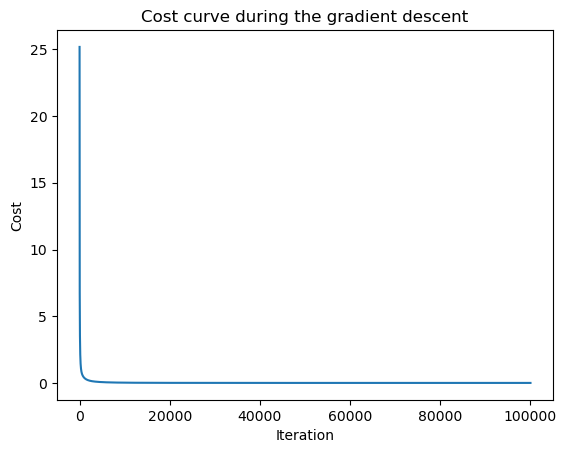

In [71]:
model2 = LinearRegression(alpha=0.01, num_iters=100000)
model2.fit(X_train, y_train)

plot_cost(model2)

### Make predictions and compare with sklearn

In [72]:
# Linear regression with sklearn on the same data 
from sklearn.linear_model import LinearRegression

model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Make predictions
y_pred = model_sk.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error with sklearn:", mse)

Mean Squared Error with sklearn: 0.01725690502874713


In [73]:
# make predictions
predictions = model2.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error with own implementation:", mse)

# Compare with sklearn LinearRegression
from sklearn.linear_model import LinearRegression


Mean Squared Error with own implementation: 0.01758113455113158
